# 5 Graphs - visualisation after removing nan
- replaces visualisations in create_graph_dataset.ipynb

In [1]:
%cd /home/ltchen/gnnpp
import sys
import json
import os
from scipy.interpolate import interp1d
from utils.data import *
from torch_geometric.utils import is_undirected, degree, contains_isolated_nodes
from tqdm import tqdm
import xarray as xr
import wandb
from exploration.graph_creation import *
from torch_geometric.loader import DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.optim import AdamW
from pytorch_lightning.loggers import WandbLogger
from exploration.graph_creation import *
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from utils.plot import plot_map
from exploration.get_graphs_and_data import *
from matplotlib import colors

/home/ltchen/gnnpp


In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
DIRECTORY = os.getcwd()
SAVEPATH = os.path.join(DIRECTORY, "explored_models/gnn_new_attr_24h/models")
JSONPATH = os.path.join(DIRECTORY, "trained_models/best_24h/params.json")
FIGUREPATH = os.path.join(DIRECTORY, 'figures')
os.makedirs(FIGUREPATH, exist_ok=True)

In [3]:
dataframes = load_dataframes(leadtime= "24h")
dataframes = summary_statistics(dataframes)

[INFO] Dataframes exist. Will load pandas dataframes.
[INFO] Calculating summary statistics for train
[INFO] Calculating summary statistics for valid
[INFO] Calculating summary statistics for test_rf
[INFO] Calculating summary statistics for test_f


In [4]:
dataframes['stations'][(dataframes['stations']['station_id'] == 2) | (dataframes['stations']['station_id'] == 3)]

,station_id,lat,lon,altitude,orog,name
2,2,53.241,4.921,10.8,0.333424,Vlieland
3,3,53.392,5.346,0.7,1.302155,Hoorn (Terschelling)


## Graph 3

<Figure size 800x600 with 0 Axes>

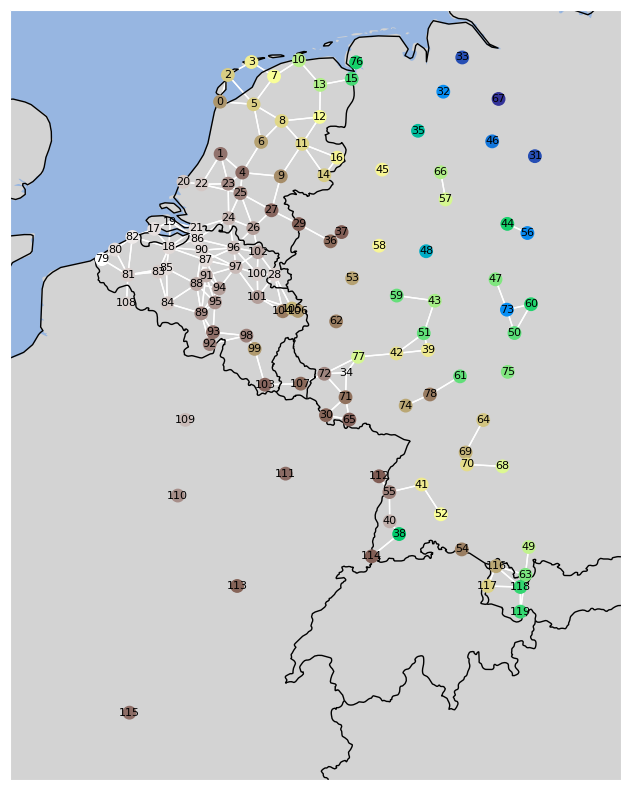

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 18
Number of edges: 342 with edge dimension: 5
Average node degree: 2.8499999046325684


In [7]:
graph_1 = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "lon", "lat", "alt-orog"], edges=[("geo", 50)], date='1997-01-02', sum_stats=True)
terrain_values = graph_1.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_1)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_1.pos)), arrows=False, ax=ax, font_size=8, edge_color='white')

plt.savefig(os.path.join(FIGUREPATH, "g2_map_edges_geo.png"), bbox_inches = 'tight', dpi=300)
plt.show()
facts_about(graph_1)

<Figure size 800x600 with 0 Axes>

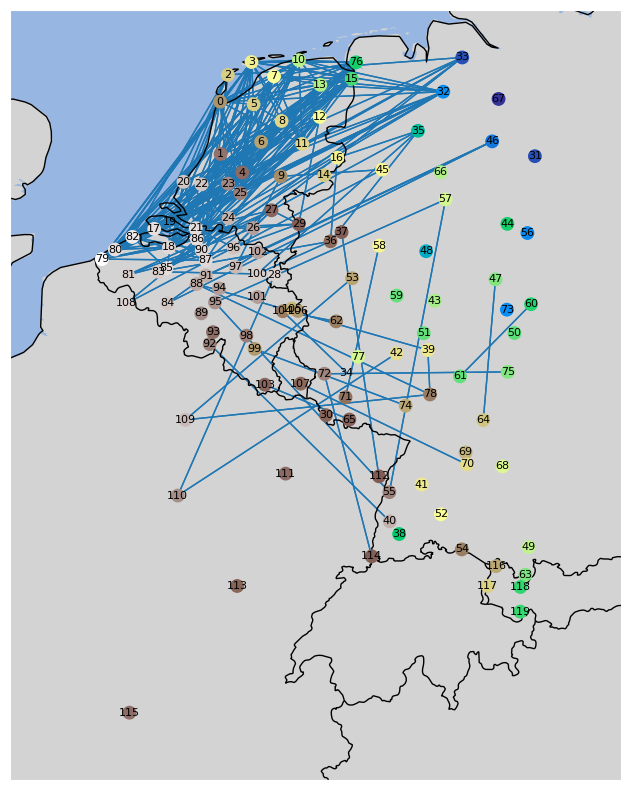

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 36
Number of edges: 492 with edge dimension: 5
Average node degree: 4.099999904632568


In [8]:
graph_alt = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "lon", "lat", "alt-orog"], edges=[("alt", 4)], date='1997-01-02', sum_stats=True)
terrain_values = graph_alt.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_alt)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_alt.pos)), arrows=False, ax=ax, font_size=8, edge_color='#1f77b4')

plt.savefig(os.path.join(FIGUREPATH, "g3alt_map.png"), bbox_inches = 'tight', dpi=300)
plt.show()
facts_about(graph_alt)

<Figure size 800x600 with 0 Axes>

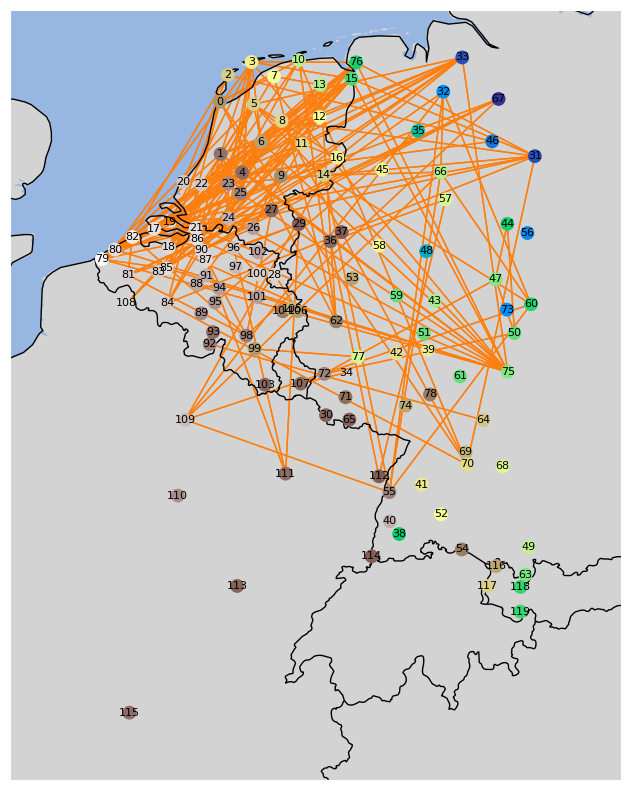

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 36
Number of edges: 492 with edge dimension: 5
Average node degree: 4.099999904632568


In [9]:
graph_orog = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "lon", "lat", "alt-orog"], edges=[("alt-orog", 1.5)], date='1997-01-02', sum_stats=True)
terrain_values = graph_orog.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_orog)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_orog.pos)), arrows=False, ax=ax, font_size=8, edge_color='#ff7f0e')

plt.savefig(os.path.join(FIGUREPATH, "g3orog_map.png"), bbox_inches = 'tight', dpi=300)
plt.show()
facts_about(graph_alt)

<Figure size 800x600 with 0 Axes>

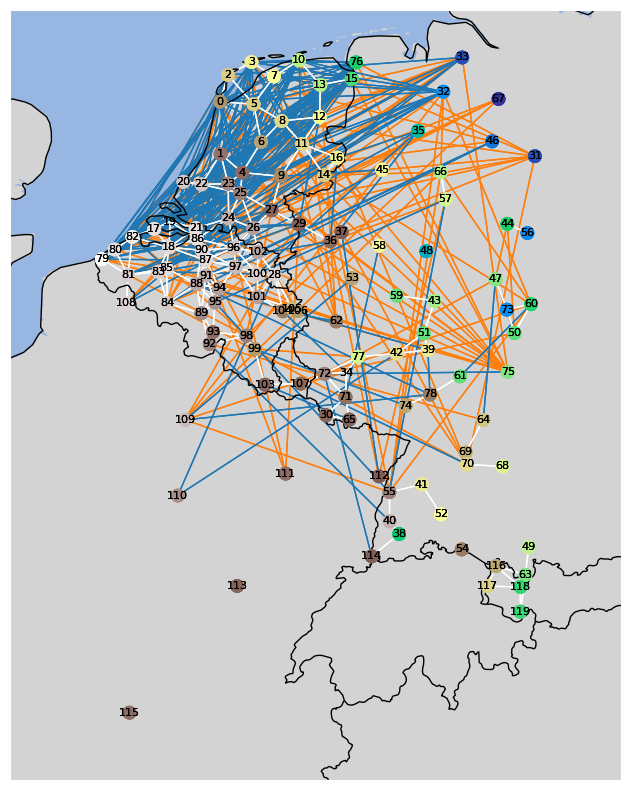

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis1 = to_networkx(graph_1)
vis2 = to_networkx(graph_alt)
vis3 = to_networkx(graph_orog)


nx.draw_networkx(vis3, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_orog.pos)), arrows=False, ax=ax, font_size=8, edge_color='#ff7f0e')
nx.draw_networkx(vis2, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_alt.pos)), arrows=False, ax=ax, font_size=8, edge_color='#1f77b4')
nx.draw_networkx(vis1, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_1.pos)), arrows=False, ax=ax, font_size=8, edge_color='white')

plt.savefig(os.path.join(FIGUREPATH, "g3geoaltorog_map.png"), bbox_inches = 'tight', dpi=300)
plt.show()

<Figure size 800x600 with 0 Axes>

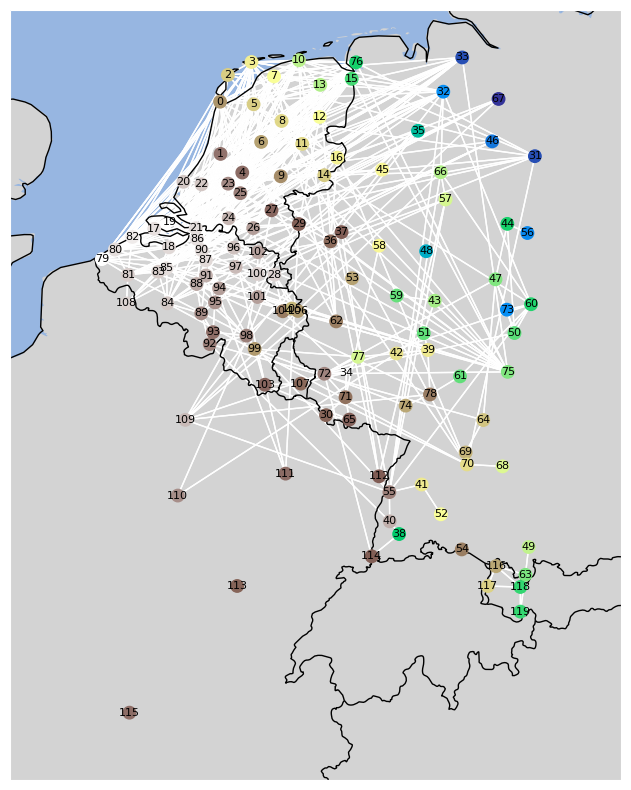

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 4
Number of edges: 1054 with edge dimension: 5
Average node degree: 8.783333778381348


In [12]:
graph_3 = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "alt-orog", "lon", "lat"], edges=[("geo", 50), ("alt", 4),("alt-orog", 1.5)], date='1997-01-02', sum_stats=True)

terrain_values = graph_3.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_3)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_3.pos)), arrows=False, ax=ax, font_size=8, edge_color='white')
plt.savefig(os.path.join(FIGUREPATH, "g3_map_edges_geo.png"), bbox_inches = 'tight', dpi=300)
plt.show()
facts_about(graph_3)
# jedes attribut bringt ca. 350 Kanten mit

## Graph 4

[INFO] Loading distances from file...


<Figure size 1200x1000 with 0 Axes>

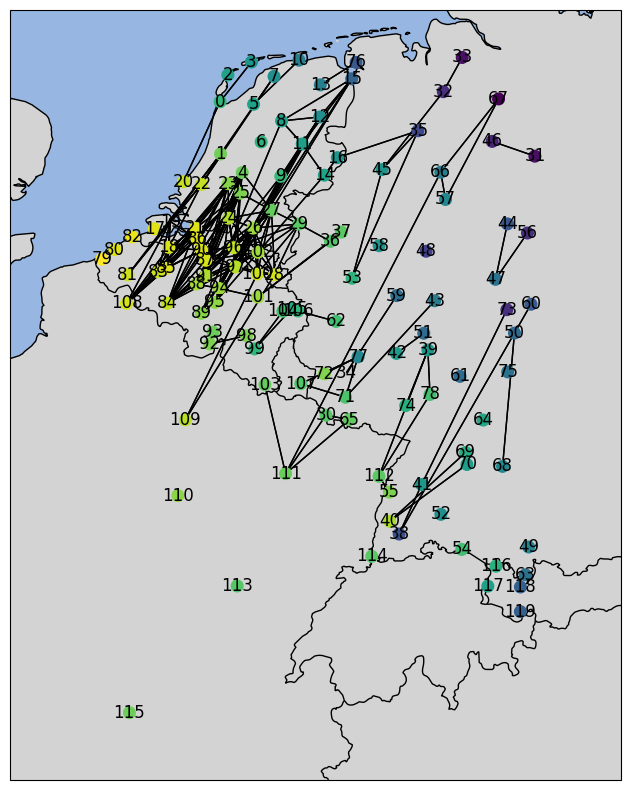

In [19]:
graph_4a = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["dist2"], edges=[("dist2", 0.003)], date='1997-01-02', sum_stats=True)

fig = plt.figure(figsize=(12, 10))
ax = plot_map()
vis = to_networkx(graph_4a)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=graph_4a.y.numpy(), pos=dict(enumerate(graph_4a.pos)), arrows=False, ax=ax)
plt.show()

In [32]:
facts_about(graph_4a)
facts_about(graph_4b)

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 23
Number of edges: 404 with edge dimension: 1
Average node degree: 3.366666555404663
Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 38
Number of edges: 406 with edge dimension: 1
Average node degree: 3.383333444595337


[INFO] Loading distances from file...
[INFO] Loading distances from file...


<Figure size 800x600 with 0 Axes>

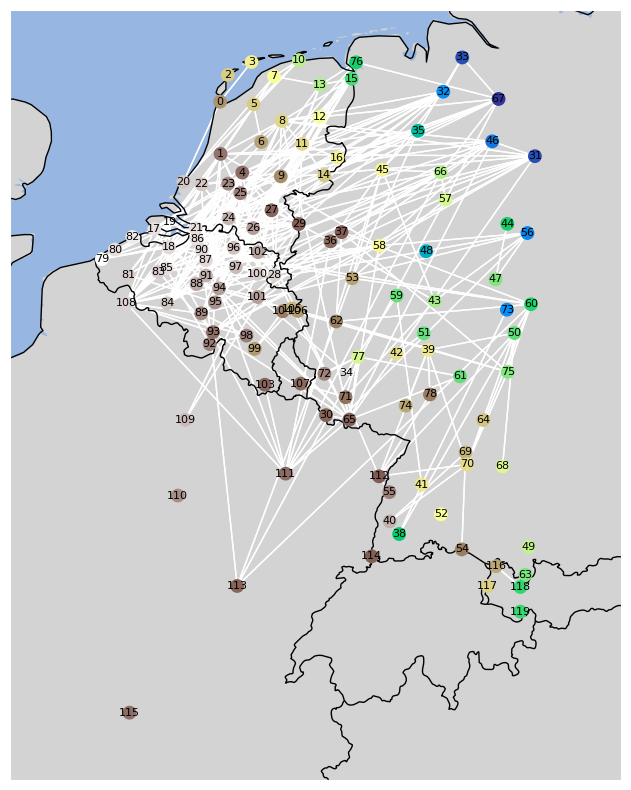

In [13]:
graph_4b = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["dist3", "dist2"], edges=[("dist3", 0.0074), ("dist2", 0.003)], date='1997-01-02', sum_stats=True, leadtime="24h")

terrain_values = graph_4b.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_4b)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_4b.pos)), arrows=False, ax=ax, font_size=8, edge_color='white')
plt.savefig(os.path.join(FIGUREPATH, "g4_map_edges_d2d3.png"), bbox_inches = 'tight', dpi=300)
plt.show()

## Graph 5

[INFO] Loading distances from file...
[INFO] Loading distances from file...


<Figure size 800x600 with 0 Axes>

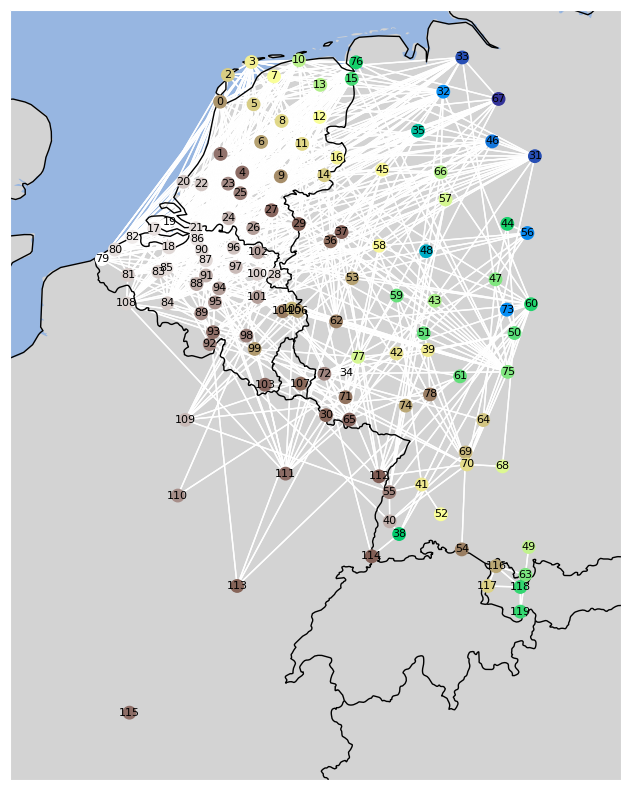

Number of nodes: 120 with feature dimension of x: 63
Number of isolated nodes: 2
Number of edges: 1608 with edge dimension: 7
Average node degree: 13.399999618530273


In [14]:
graph_5 = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "lon", "lat", "alt-orog", "dist2", "dist3"], edges=[("geo", 50),("alt", 4), ("alt-orog", 1.5), ("dist2", 0.003), ("dist3", 0.0074)], date='1997-01-02', sum_stats=True, leadtime="24h")

terrain_values = graph_5.y.numpy() + 273.15
norm = colors.Normalize(vmin=min(terrain_values), vmax=max(terrain_values))
norm_terrain = norm(terrain_values)
cmap = plt.cm.terrain
node_colors = cmap(norm_terrain)

fig = plt.figure(figsize=(8, 6))
ax = plot_map()
vis = to_networkx(graph_5)
# nx.draw_networkx(vis, node_size=70, node_color=graph_1.y.numpy(), pos=graph_1.pos, arrows=False, ax=ax)
nx.draw_networkx(vis, node_size=80, node_color=node_colors, pos=dict(enumerate(graph_5.pos)), arrows=False, ax=ax, font_size=8, edge_color='white')
plt.savefig(os.path.join(FIGUREPATH, "g5_map_edges_all.png"), bbox_inches = 'tight', dpi=300)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm._A = []
# plt.colorbar(sm, ax=ax, label="Observed Temperature (K) on 1997-01-02")
plt.show()
facts_about(graph_5)

#graph_1 = create_one_graph(df_train=dataframes['train'][0], df_target=dataframes['train'][1], station_df=dataframes['stations'], attributes=["geo", "alt", "lon", "lat", "alt-orog"], edges=[("geo", 50)], date='1997-01-02', sum_stats=True)
